# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

# **GOAL**

 The business goal of the Portuguese bank is to increase marketing campaign efficincy by identifying the parameters that leads to winning customers for subscribing the deposit. i.e the reduction in marketing cost and time whereas maintiang the deposit subscription numbers.

 The ML model goal is to predict if the customer will subscribe a term deposit or not.

# **Data**
This ***origial*** data is from telphone based direct marketing campaign done by Portuguese bank.


*   **Total contacts:** 79354

*   **Time period:** May 2008 - November 2010

*   **Number of campaign:** 17

*   **Total number of sucess:** 6499 (8%)


The dataset analzyed below are from UCI Machine Learning repository https://archive.ics.uci.edu/dataset/222/bank+marketing



### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer

!pip install category_encoders
from category_encoders import LeaveOneOutEncoder


from sklearn import set_config
#setting this will display the pipelines
set_config(display="diagram")

warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
print(df.shape)


(41188, 21)


# UCI Machine Learning data details
1) bank-additional-full.csv with all examples (41188) and 20 inputs
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Objective/Goal
The objective is to predict if the customer will subscribe a term deposit or not. i.e term deposit variable y as 'yes' or 'no'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Percentage of Yes: 0.11265417111780131
Percentage of No: 36548


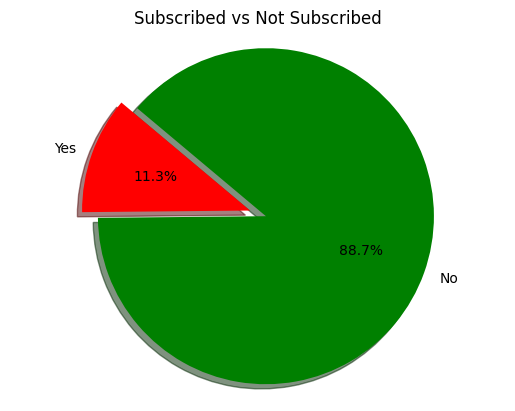

In [31]:
# Determine if its balanced or imbalanced dataset
# Find the % of yes vs no

yes_count = (df['y'] == 'yes').sum()
no_count = (df['y'] == 'no').sum()
per_yes = yes_count / (yes_count + no_count)
per_no = no_count / (yes_count + no_count)
print(f"Percentage of Yes: {per_yes}")
print(f"Percentage of No: {no_count}")

#pie plot
labels = ['Yes', 'No']
sizes = [per_yes, per_no]
colors = ['red', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Subscribed vs Not Subscribed')
plt.show()


**Imbalanced class**
The data is highly impbalanced. only 11.3% has 'yes' where as 88.7% has no.


1.   Need to use stratify in train and test splitting of data
2.   Need to SMOTE the training data i.e synthetically oversample the minority class



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [32]:
# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


#Split train and test data with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [50]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


# make coloumn transformer with polynomial and LeaveOneOutEncoder encoder
# apply standardScaler to all coloumns

preprocessor = make_column_transformer((LeaveOneOutEncoder(), categorical_cols),
                                       (PolynomialFeatures(include_bias = False, degree = 2), numerical_cols))


X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.fit_transform(X_test, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

# SMOTE the  training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

#Size of resampled data
X_train_resampled.shape, X_test_transformed.shape


((51166, 75), (12357, 75))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [51]:
# Create simple Logistic regression model

results = {
    "Model" : [],
    "Train Time" : [],
    "Train Accuracy" : [],
    "Test Accuracy" : []

}

start_time = time.time()
lr = LogisticRegression().fit(X_train_resampled, y_train_resampled)
fit_time = (time.time() - start_time)

#Evaluate train and test score
train_score = lr.score(X_train_resampled, y_train_resampled)
test_score = lr.score(X_test_transformed, y_test)

# Append the results
results["Model"].append("Logistic Regression")
results["Train Time"].append(fit_time)
results["Train Accuracy"].append(train_score)
results["Test Accuracy"].append(test_score)

#print results
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,3.183446,0.880253,0.771466


### Problem 9: Score the Model

What is the accuracy of your model?



In [52]:
# Print accuracy of the model
print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

Train Accuracy: 0.8802525114333737
Test Accuracy: 0.7714655660759084


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [53]:
models = {
    'knn': KNeighborsClassifier(),
    'svc': SVC(),
    'decisiontreeclassifier': DecisionTreeClassifier()
}

# Fit the data fo each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    fit_time = (time.time() - start_time)

    # Train and test scores
    train_score = model.score(X_train_resampled, y_train_resampled)
    test_score = model.score(X_test_transformed, y_test)
    results["Model"].append(name)
    results["Train Time"].append(fit_time)
    results["Train Accuracy"].append(train_score)
    results["Test Accuracy"].append(test_score)

# print the results
results_df = pd.DataFrame(results)
results_df



,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,3.183446,0.880253,0.771466
1,knn,0.008454,0.941113,0.867282
2,svc,114.301642,0.900559,0.908635
3,decisiontreeclassifier,0.597963,1.000000,0.791940


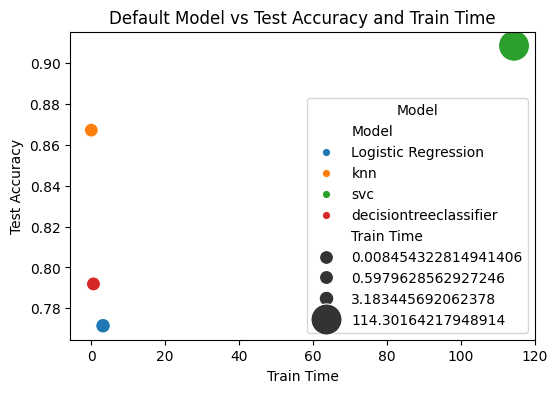

In [54]:
# Scatter Plot Model vs Test acuracy and Train time as bubble size

plt.figure(figsize=(6, 4))
sns.scatterplot(data=results_df, x='Train Time', y='Test Accuracy', hue='Model', size='Train Time', sizes=(100, 500))
plt.title('Default Model vs Test Accuracy and Train Time')
plt.xlabel('Train Time')
plt.ylabel('Test Accuracy')
plt.legend(title='Model')
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

*   **The dataset doesn't contain gender feature**

It has already been removed as the rate of sucess is similar for male and female

| Male | Female|
|------|-------|
| 11% | 12% |







# Hyperparameter tuning and grid serach


*   KNN neighbors : 3,5,7
*   Logitstic regression : [0.1 , 1, 10]
*   SVC Kernel : Linear and Gaussian
*   Decision Tree depth : 5,10,15





In [55]:
# Hyperparameter tuning using grid search

models_tunned = {
    'knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'svc': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'max_depth': [5, 10, 15]})
}

In [56]:
results_tunned = {
    "Model" : [],
    "Train Time" : [],
    "Train Accuracy" : [],
    "Test Accuracy" : [],
    "Best Parameters" : []

}

for name, (model, params) in models_tunned.items():

    # Perform grid search
    grid_search = GridSearchCV(estimator = model, param_grid=params,scoring ='accuracy', cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train_resampled, y_train_resampled)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    #Get the best parameter
    best_params = grid_search.best_params_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train_resampled, y_train_resampled)
    test_score = best_model.score(X_test_transformed, y_test)

    # Append the results
    results_tunned["Model"].append(name)
    results_tunned["Train Time"].append(fit_time)
    results_tunned["Train Accuracy"].append(train_score)
    results_tunned["Test Accuracy"].append(test_score)
    results_tunned["Best Parameters"].append(best_params)

    print("The best parameters are ", best_params)

#print the results_tunned
results_tunned_df = pd.DataFrame(results_tunned)
results_tunned_df

The best parameters are  {'n_neighbors': 3}
The best parameters are  {'C': 10}
The best parameters are  {'C': 10, 'kernel': 'rbf'}
The best parameters are  {'max_depth': 5}


,Model,Train Time,Train Accuracy,Test Accuracy,Best Parameters
0,knn,22.079772,0.959504,0.868334,{'n_neighbors': 3}
1,logisticregression,16.692056,0.883595,0.773893,{'C': 10}
2,svc,412.398071,0.922605,0.890831,"{'C': 10, 'kernel': 'rbf'}"
3,decisiontreeclassifier,2.731206,1.000000,0.791940,{'max_depth': 5}


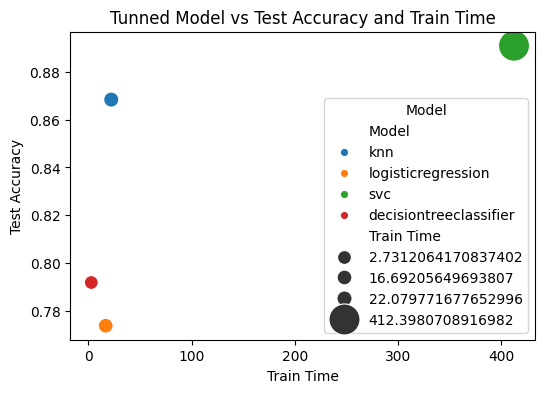

In [57]:
# Scatter Plot Model vs Test acuracy and Train time as bubble size

plt.figure(figsize=(6, 4))
sns.scatterplot(data=results_tunned_df, x='Train Time', y='Test Accuracy', hue='Model', size='Train Time', sizes=(100, 500))
plt.title('Tunned Model vs Test Accuracy and Train Time')
plt.xlabel('Train Time')
plt.ylabel('Test Accuracy')
plt.legend(title='Model')
plt.show()


# Outcome
*   Based on the model tunning for accuracy, SVC outperforms all others models but, SVC takes a very long training time comparatavely.
* KNN is 20x faster with an accuracy of 86% compared to 89% accuracy of SVC
* KNN with n_neighbors = 3 gives the best accuracy tade-off for for faster training time.

In [58]:
# Find the most important categorical parameter

#Calculate the permutation importance
from sklearn.inspection import permutation_importance

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_resampled, y_train_resampled)

knn_score = knn_model.score(X_test_transformed, y_test)
print(f"KNN Test Accuracy: {knn_score}")

results = permutation_importance(knn_model, X_test_transformed, y_test)


KNN Test Accuracy: 0.8683337379622886


In [59]:
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()
importances = pd.DataFrame(data=results.importances_mean, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)
importances.head(20)

,Importance
leaveoneoutencoder__month,0.005276
leaveoneoutencoder__contact,0.002056
polynomialfeatures__cons.price.idx,0.001554
polynomialfeatures__cons.price.idx^2,0.001538
leaveoneoutencoder__day_of_week,0.001408
leaveoneoutencoder__job,0.001182
polynomialfeatures__campaign emp.var.rate,0.001182
leaveoneoutencoder__loan,0.001149
polynomialfeatures__emp.var.rate^2,0.000890
polynomialfeatures__campaign cons.conf.idx,0.000664


## **Recommendations to Bank**

### Based on data modelling and analysis, the top 3 features indicating the clients will subscribe for the term deposit are:



1.   Month in which client was contacted
2.   Contact communication type
3.   Consumer price index of the month

